![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [66]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [67]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [68]:
#DATA_DIR = '/Module_3'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [70]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [72]:
df_test.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [73]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [74]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [75]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [77]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
47945,id_566,Athens,"['Mediterranean', 'European', 'Greek', 'Vegeta...",567.0,$$ - $$$,47.0,"[['Dining roulette', 'Authentisch und herzlich...",/Restaurant_Review-g189400-d1724914-Reviews-Ta...,d1724914,1,4.0
13805,id_2293,London,"['Cafe', 'European', 'British', 'Delicatessen'...",2298.0,$$ - $$$,125.0,"[['Amazing food quality', 'Great quality and p...",/Restaurant_Review-g186338-d7294428-Reviews-Br...,d7294428,1,4.5
14897,id_14726,London,NaN,14737.0,NaN,NaN,"[['Good value cafe'], ['09/28/2017']]",/Restaurant_Review-g186338-d12938820-Reviews-T...,d12938820,1,3.0
22279,id_16251,London,['Pizza'],16263.0,NaN,4.0,[['45 mins to arrive.. Justified by receiving....,/Restaurant_Review-g186338-d5122926-Reviews-Do...,d5122926,1,2.5
20315,id_3214,Lisbon,['Japanese'],3218.0,$$ - $$$,19.0,"[['Worse sushi of ever .......Terrible...', 'W...",/Restaurant_Review-g189158-d6420536-Reviews-Re...,d6420536,1,3.5


In [78]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [79]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [80]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
49970    0
49971    0
49972    1
49973    0
49974    0
49975    0
49976    0
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    1
49987    0
49988    1
49989    1
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [81]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [82]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [83]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [84]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
15827,id_2524,['French'],2525.0,$$ - $$$,28.0,"[['The one is auderghem is much better', 'Cust...",/Restaurant_Review-g188644-d3733033-Reviews-La...,d3733033,1,3.5,...,0,0,0,0,0,0,0,0,0,0
22753,id_511,"['American', 'Bar', 'British', 'Pub', 'Vegetar...",512.0,$$ - $$$,331.0,"[['Loved the decor', 'Value'], ['01/04/2018', ...",/Restaurant_Review-g186338-d2368799-Reviews-Lo...,d2368799,1,4.5,...,0,0,0,0,0,0,0,0,0,0
29195,id_255,"['Greek', 'Mediterranean', 'European', 'Vegeta...",256.0,$$ - $$$,141.0,"[['Great Greek Food Break from Austrian Food',...",/Restaurant_Review-g190454-d7989687-Reviews-Tr...,d7989687,1,4.5,...,0,0,0,0,0,0,1,0,0,0
30473,id_1422,NaN,1423.0,NaN,15.0,"[['So-so service, high prices', 'Do not recomm...",/Restaurant_Review-g189180-d10300149-Reviews-3...,d10300149,1,2.5,...,1,0,0,0,0,0,0,0,0,0
48825,id_2117,"['Fast Food', 'Turkish']",2118.0,NaN,14.0,"[['ate here 3 times, simple menu', 'döner'], [...",/Restaurant_Review-g188644-d4353097-Reviews-Ke...,d4353097,1,3.5,...,0,0,0,0,0,0,0,0,0,0


# Price Range

#### Возьмем следующий признак "Price Range".

In [86]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [87]:
data['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

Заменить значения Price Range на числовые значения, если  встречается значение NaN, то заменим на наиболее часто встречающееся.

In [88]:
# Ваша обработка 'Price Range'
price_categories = {
    data['Price Range'].unique()[2]: 1,
    data['Price Range'].unique()[0]: 2,
    data['Price Range'].unique()[1]: 3
}

def categorise_price(x):
    if pd.isna(x):
        return 2
    else:
        return price_categories[x]

data['Price Range'] = data['Price Range'].apply(categorise_price)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [89]:
data.sample(1)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
26011,id_4606,['Italian'],4607.0,2,14.0,"[['Great desserts', 'Ridiculous place'], ['01/...",/Restaurant_Review-g187791-d12926697-Reviews-C...,d12926697,1,4.0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
# тут ваш код на обработку других признаков
# .....

# Cuisine Style

In [91]:
data_copy = data.copy()

from ast import literal_eval

def number_cuisine(mystring):
    if pd.isna(mystring):
        return 1
    else:
        return len(literal_eval(mystring))
    
data_copy['Cuisines_number'] = data_copy['Cuisine Style'].apply(number_cuisine)

# Reviews

In [92]:
data_copy['Reviews'][0]

'[[], []]'

In [93]:
data_copy['Reviews'].fillna(data_copy['Reviews'][0], inplace=True)

def make_list(x):
    return literal_eval(x.replace('nan', 'None'))
data_copy['Reviews'] = data_copy['Reviews'].apply(make_list)

In [94]:
type(data_copy['Reviews'][1])

list

In [95]:
def reviews_interval(x):
    if len(x[1]) < 2:
        return 0
    else:
        return abs((pd.to_datetime(x[1][1]) - pd.to_datetime(x[1][0])).days)
    
def last_review(x):
    if len(x[1]) < 1:
        return 0
    else:
        return max(list(map(lambda mystring: pd.to_datetime(mystring).timestamp(), x[1])))

data_copy['Reviews_intreval'] = data_copy['Reviews'].apply(reviews_interval)
data_copy['Last_review'] = data_copy['Reviews'].apply(last_review)
data_copy.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisines_number,Reviews_intreval,Last_review
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,2,0,0.000000e+00
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,5,37,1.512432e+09
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,1,22,1.514419e+09
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,5,14,1.512518e+09
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,6,15,1.518048e+09


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

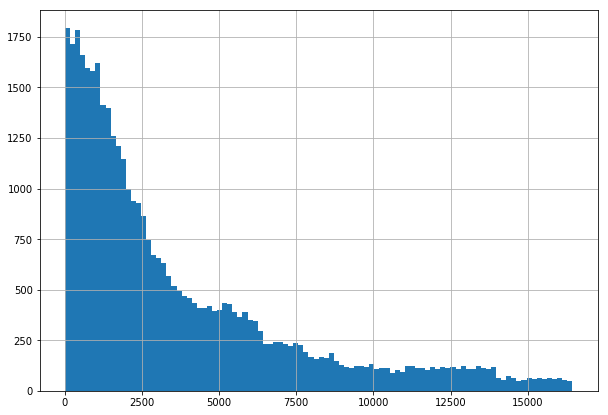

In [96]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

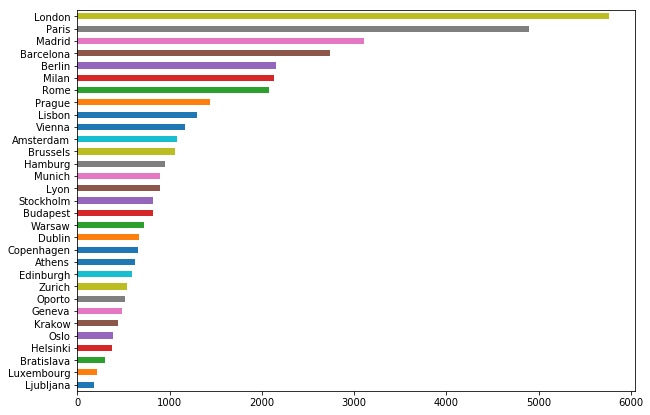

In [97]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

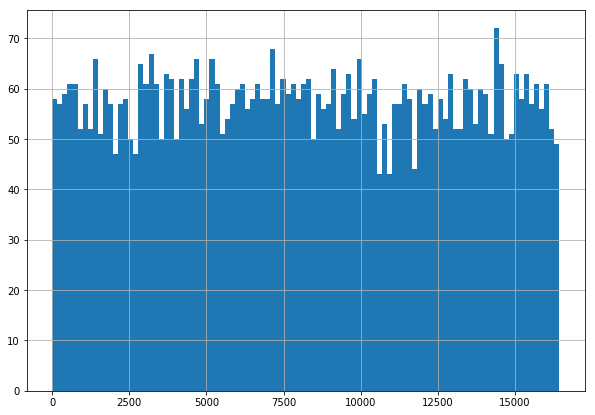

In [98]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

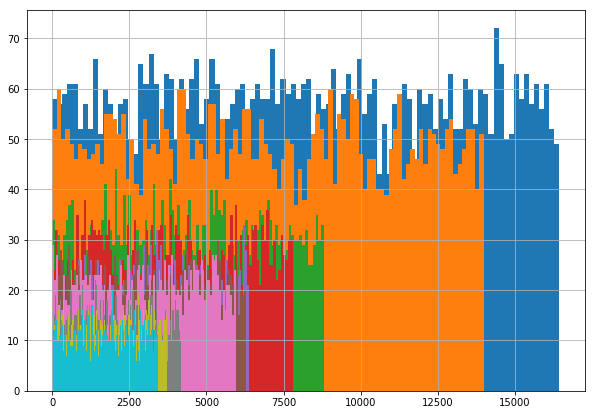

In [99]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

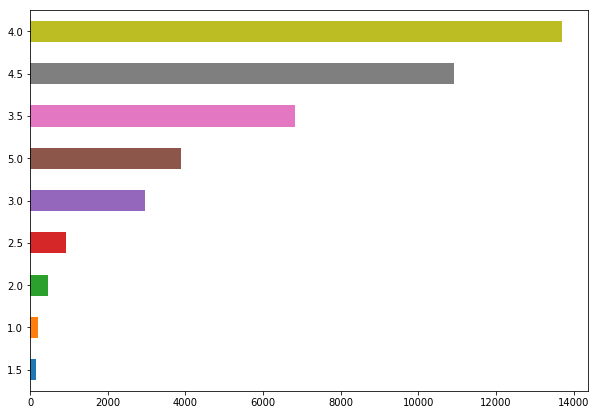

In [100]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

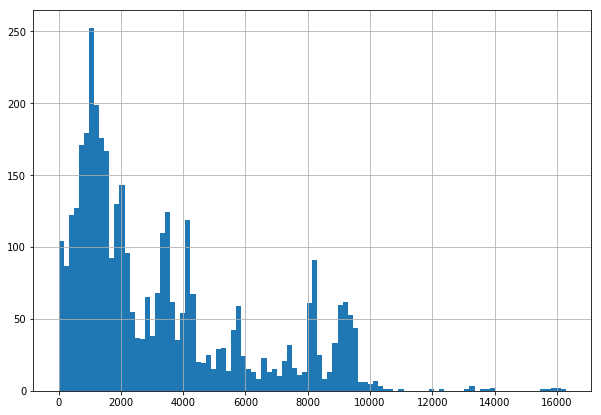

In [101]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

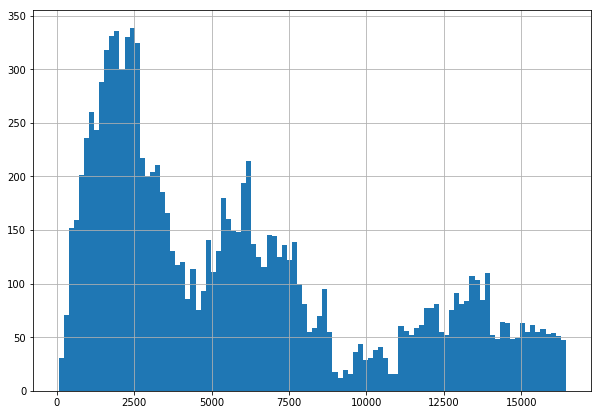

In [102]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

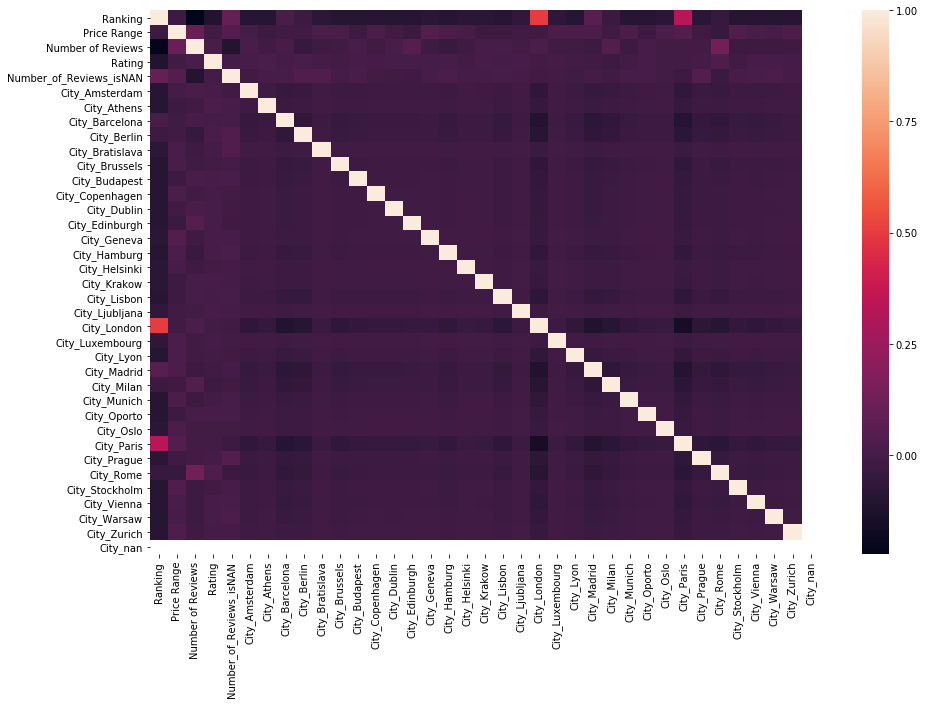

In [103]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [104]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [105]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Number of Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Cuisine Styles_isNAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    df_output['Price Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')
    
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Reviews'].fillna(df_output['Reviews'][0], inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    
    df_output['City_draft'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=['City_draft'], dummy_na=True)    
    
    price_categories = {
        df_output['Price Range'].value_counts().index[1]: 1,
        df_output['Price Range'].value_counts().index[0]: 2,
        df_output['Price Range'].value_counts().index[2]: 3
    }

    def map_price(x):
        if pd.isna(x):
            return 2
        else:
            return price_categories[x]

    df_output['Price Range'] = df_output['Price Range'].apply(map_price)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    ranking_mean = df_output.groupby(['City'])['Ranking'].mean()
    restaurants_counts = df_output['City'].value_counts()
    def normalize_ranking(x):
        return (x['Ranking'] - ranking_mean[x['City']]) / restaurants_counts[x['City']]
    
    df_output['Ranking_normalized'] = df_output.apply(normalize_ranking, axis=1)
    df_output.drop(['Ranking'], axis = 1, inplace = True)
    
    def number_cuisines(x):
        if pd.isna(x):
            return 1
        else:
            return len(literal_eval(x))
    
    df_output['Cuisines_Number'] = df_output['Cuisine Style'].apply(number_cuisines)
    
    # Предположим, что длина отзыва как-то связана с оценкой ресторана
    df_output['Reviews_length'] = df_output['Reviews'].apply(lambda x: len(x))

    def make_list(x):
        return literal_eval(x.replace('nan', 'None'))
    df_output['Reviews'] = df_output['Reviews'].apply(make_list)

    def reviews_interval(x):
        if len(x[1]) < 2:
            return 0
        else:
            return abs((pd.to_datetime(x[1][1]) - pd.to_datetime(x[1][0])).days)

    def last_review(x):
        if len(x[1]) < 1:
            return 0
        else:
            return max(list(map(lambda y: pd.to_datetime(y).timestamp(), x[1])))

    df_output['Reviews_intreval'] = df_output['Reviews'].apply(reviews_interval)
    df_output['Last_review'] = df_output['Reviews'].apply(last_review)
    
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [106]:
def round_of_rating(number):
    result = round(number * 2) / 2
    if (result > 5): result = 5
    return result

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [107]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Price Range,Number of Reviews,sample,Rating,Number of Reviews_isNAN,Cuisine Styles_isNAN,Price Range_isNAN,City_draft_Amsterdam,City_draft_Athens,City_draft_Barcelona,...,City_draft_Stockholm,City_draft_Vienna,City_draft_Warsaw,City_draft_Zurich,City_draft_nan,Ranking_normalized,Cuisines_Number,Reviews_length,Reviews_intreval,Last_review
46816,2,39.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,-0.509819,6,81,1,1.495238e+09
28839,1,153.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,-0.495653,4,76,57,1.513382e+09
12651,2,963.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,-1.058071,7,69,14,1.513469e+09
43772,2,6.0,1,4.5,0,1,1,0,0,0,...,0,0,0,0,0,0.006727,1,39,0,1.510704e+09
22555,2,12.0,1,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1.073853,1,45,0,1.423958e+09
42506,2,0.0,1,4.0,0,1,1,0,0,0,...,0,0,0,0,0,0.583972,1,8,0,0.000000e+00
3535,2,183.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.771029,2,66,354,1.514765e+09
37630,2,2279.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,-1.120261,2,104,8,1.515197e+09
43314,2,8.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,-0.245917,3,8,0,0.000000e+00
22007,2,166.0,1,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0.920166,4,71,56,1.503792e+09


In [108]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number of Reviews_isNAN    50000 non-null uint8
Cuisine Styles_isNAN       50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
City_draft_Amsterdam       50000 non-null uint8
City_draft_Athens          50000 non-null uint8
City_draft_Barcelona       50000 non-null uint8
City_draft_Berlin          50000 non-null uint8
City_draft_Bratislava      50000 non-null uint8
City_draft_Brussels        50000 non-null uint8
City_draft_Budapest        50000 non-null uint8
City_draft_Copenhagen      50000 non-null uint8
City_draft_Dublin          50000 non-null uint8
City_draft_Edinburgh       50000 non-null uint8
City_draft_Geneva          50000 non-null uint8
City_draft_Hamburg     

In [109]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [110]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [111]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [112]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [113]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [114]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [115]:
y_pred = np.array([round_of_rating(x) for x in y_pred])
y_pred

array([4.5, 5. , 4. , ..., 4.5, 4. , 4. ])

In [116]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1714375


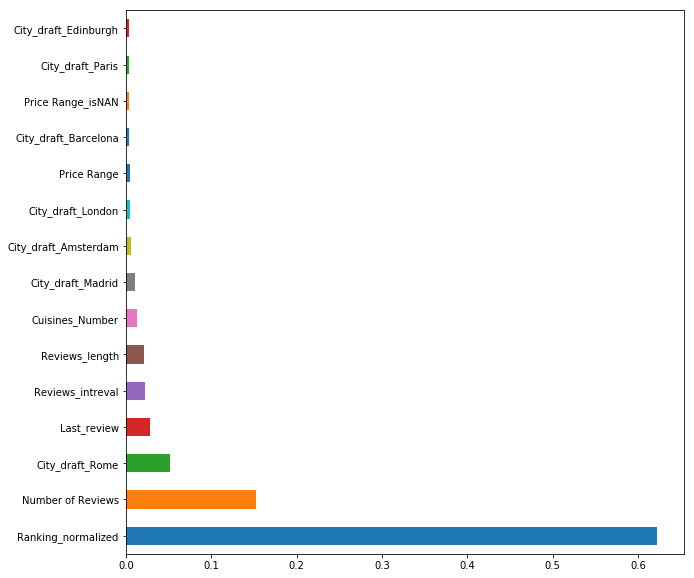

In [117]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [118]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,Number of Reviews_isNAN,Cuisine Styles_isNAN,Price Range_isNAN,City_draft_Amsterdam,City_draft_Athens,City_draft_Barcelona,City_draft_Berlin,...,City_draft_Stockholm,City_draft_Vienna,City_draft_Warsaw,City_draft_Zurich,City_draft_nan,Ranking_normalized,Cuisines_Number,Reviews_length,Reviews_intreval,Last_review
8915,2,30.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.880609,5,112,144,1.502410e+09
2064,2,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.123757,2,8,0,0.000000e+00
9792,2,45.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.466959,1,46,0,1.511482e+09
9375,3,274.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.880701,5,84,5,1.508198e+09
3220,2,49.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,-0.525152,6,66,76,1.504138e+09
2591,2,25.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,-0.619008,1,106,283,1.498349e+09
2527,2,105.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.174352,2,94,128,1.519258e+09
4832,2,11.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0.821553,1,8,0,0.000000e+00
4986,2,68.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.275312,3,80,175,1.483315e+09
5970,2,10.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.497886,1,73,73,1.513987e+09


In [119]:
test_data = test_data.drop(['Rating'], axis=1)

In [120]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
5,id_5,4.5
6,id_6,4.5
7,id_7,2.0
8,id_8,2.0
9,id_9,3.5


In [121]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [122]:
predict_submission

array([3.165, 4.24 , 4.475, ..., 3.055, 4.475, 4.265])

In [123]:
predict_submission = np.array([round_of_rating(x) for x in predict_submission])
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4.5])

In [124]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,2.0
8,id_8,4.5
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
